In [65]:
import glob
IMG_NAMES_FULL = glob.glob("sim_data/sim_json/r*.json")[1:]
IMG_NAMES_FULL[:5]

['sim_data/sim_json/record_10529.json',
 'sim_data/sim_json/record_7920.json',
 'sim_data/sim_json/record_12514.json',
 'sim_data/sim_json/record_6632.json',
 'sim_data/sim_json/record_10483.json']

In [66]:
def simplify_angle(angle):
    passive_angle = abs(angle)
    restorer = angle / passive_angle
    simplified_angle = angle
    
#     if passive_angle <= 0.125:
#         simplified_angle = 0
#     elif passive_angle <= 0.25:
#         simplified_angle = 0.25
#     elif passive_angle <= 0.5:
#         simplified_angle = 0.5
#     elif passive_angle <= 0.75:
#         simplified_angle = 0.75
#     elif passive_angle <= 1:
#         simplified_angle = 1

    if passive_angle <= 0.125:
        simplified_angle = 0
    elif passive_angle < 0.5:
        simplified_angle = 0.35
    elif passive_angle <= 1:
        simplified_angle = 0.75
    
    if simplified_angle == 0:
        return simplified_angle
    else:
        return restorer*simplified_angle

In [70]:
import numpy as np
import json
import cv2

zero_counter = 0

angle_counter = {
    '0.35': 0,
    '0.75': 0,
    '-0.35': 0,
    '-0.75': 0
}

image_arr = []

dataset = {
    'image_name': [],
    'angle': [],
    'throttle': [],
    'milliseconds': []
}
print(len(IMG_NAMES_FULL))

for filename in IMG_NAMES_FULL:
    with open(filename, 'r') as f:
        data = f.read()
        json_data = json.loads(data)
        angle = simplify_angle(json_data['user/angle'])
        if angle == 0 and zero_counter < 2000:
            zero_counter += 1
            img = cv2.imread('sim_data/sim_images/' + json_data['cam/image_array'])
            print(img)
            image_arr.append(img)
            dataset['image_name'].append(json_data['cam/image_array'])
            dataset['angle'].append(angle)
            dataset['throttle'].append(json_data['user/throttle'])
        elif angle != 0 and angle_counter[str(angle)] < 2000:
            angle_counter[str(angle)] += 1
            img = cv2.imread('sim_data/sim_images/' + json_data['cam/image_array'])
            image_arr.append(img)
#             image_arr.append(cv2.flip(img, 1))
            dataset['image_name'].append(json_data['cam/image_array'])
#             dataset['image_name'].append(json_data['cam/image_array'][:-4] + 'aug' + json_data['cam/image_array'][-4:])
            dataset['angle'].append(angle)
#             dataset['angle'].append(-angle)
            dataset['throttle'].append(json_data['user/throttle'])
#             dataset['throttle'].append(json_data['user/throttle'])
    


13643
[[[192 145 114]
  [192 145 114]
  [192 145 114]
  ...
  [192 145 114]
  [192 145 114]
  [192 145 114]]

 [[192 145 114]
  [192 145 114]
  [192 145 114]
  ...
  [192 145 114]
  [192 145 114]
  [192 145 114]]

 [[193 146 115]
  [193 146 115]
  [193 146 115]
  ...
  [193 146 115]
  [193 146 115]
  [193 146 115]]

 ...

 [[154 146 139]
  [162 154 147]
  [161 153 146]
  ...
  [167 158 154]
  [165 156 152]
  [169 160 156]]

 [[148 140 133]
  [165 157 150]
  [165 157 150]
  ...
  [168 159 155]
  [168 159 155]
  [165 156 152]]

 [[137 129 122]
  [162 154 147]
  [167 159 152]
  ...
  [174 165 161]
  [170 161 157]
  [157 148 144]]]
[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 126 102]
  [164 126 102]
  [164 126 102]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 128 102]
  [165 128 102]
  [165 128 102]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[140 130 123]
  [140 130 123]
  [140 130 123

[[[164 127  99]
  [164 127  99]
  [163 126  98]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 128 100]
  [165 128 100]
  [165 128 100]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[143 133 126]
  [140 130 123]
  [137 127 120]
  ...
  [144 142 134]
  [146 145 135]
  [163 162 152]]

 [[139 129 122]
  [138 128 121]
  [137 127 120]
  ...
  [159 157 149]
  [155 154 144]
  [158 157 147]]

 [[134 124 117]
  [135 125 118]
  [137 127 120]
  ...
  [180 178 170]
  [166 165 155]
  [151 150 140]]]
[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [162 122  97]
  [163 123  98]
  [163 123  98]]

 [[164 126 102]
  [164 126 102]
  [164 126 102]
  ...
  [163 123  98]
  [163 123  98]
  [163 123  98]]

 [[165 128 102]
  [165 128 102]
  [165 128 102]
  ...
  [163 123  98]
  [164 124  99]
  [164 124  99]]

 ...

 [[132 122 115]
  [134 124 117]
  [137 127 120]
  ..

[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 126 102]
  [164 126 102]
  [164 126 102]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 128 102]
  [165 128 102]
  [165 128 102]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[139 129 122]
  [140 130 123]
  [142 132 125]
  ...
  [255 252 251]
  [255 254 255]
  [255 254 255]]

 [[143 133 126]
  [141 131 124]
  [139 129 122]
  ...
  [254 250 249]
  [255 254 255]
  [255 254 255]]

 [[140 130 123]
  [136 126 119]
  [131 121 114]
  ...
  [253 249 248]
  [254 249 251]
  [255 250 252]]]
[[[175 132 105]
  [175 132 105]
  [174 131 104]
  ...
  [161 123  99]
  [162 124 100]
  [162 124 100]]

 [[175 132 105]
  [175 132 105]
  [175 132 105]
  ...
  [162 124 100]
  [162 124 100]
  [163 125 101]]

 [[176 133 106]
  [176 133 106]
  [175 132 105]
  ...
  [163 126 100]
  [164 127 101]
  [164 127 101]]

 ...

 [[160 151 147]
  [162 153 149]
  [169 160 156]
  ..

[[[178 135 108]
  [178 135 108]
  [177 134 107]
  ...
  [163 126  98]
  [164 127  99]
  [164 127  99]]

 [[178 135 108]
  [178 135 108]
  [178 135 108]
  ...
  [164 127  99]
  [164 127  99]
  [164 127  99]]

 [[179 136 109]
  [179 136 109]
  [178 135 108]
  ...
  [165 128 100]
  [165 128 100]
  [165 128 100]]

 ...

 [[166 156 149]
  [165 155 148]
  [165 155 148]
  ...
  [255 255 249]
  [233 225 218]
  [196 188 181]]

 [[170 160 153]
  [170 160 153]
  [169 159 152]
  ...
  [255 255 251]
  [255 254 249]
  [240 234 229]]

 [[164 154 147]
  [164 154 147]
  [162 152 145]
  ...
  [245 241 236]
  [251 245 240]
  [255 255 251]]]
[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[164 126 102]
  [164 126 102]
  [164 126 102]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[165 128 102]
  [165 128 102]
  [165 128 102]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[116 119 117]
  [121 122 120]
  [129 128 124]
  ..

[[[174 131 104]
  [174 131 104]
  [173 130 103]
  ...
  [162 124 100]
  [163 125 101]
  [163 125 101]]

 [[174 131 104]
  [174 131 104]
  [174 131 104]
  ...
  [163 125 101]
  [163 125 101]
  [163 125 101]]

 [[175 132 105]
  [175 132 105]
  [174 131 104]
  ...
  [164 127 101]
  [164 127 101]
  [164 127 101]]

 ...

 [[161 152 148]
  [154 145 141]
  [152 143 139]
  ...
  [ 65 117 100]
  [ 67 119 102]
  [ 77 129 112]]

 [[164 155 151]
  [161 152 148]
  [163 154 150]
  ...
  [ 59 111  94]
  [ 61 113  96]
  [ 70 122 105]]

 [[164 155 151]
  [173 164 160]
  [184 175 171]
  ...
  [ 52 104  87]
  [ 52 104  87]
  [ 58 110  93]]]
[[[189 143 112]
  [189 143 112]
  [189 143 112]
  ...
  [196 149 118]
  [196 149 118]
  [196 149 118]]

 [[189 143 112]
  [189 143 112]
  [189 143 112]
  ...
  [196 149 118]
  [196 149 118]
  [196 149 118]]

 [[190 144 113]
  [190 144 113]
  [190 144 113]
  ...
  [197 150 119]
  [197 150 119]
  [197 150 119]]

 ...

 [[161 151 144]
  [153 143 136]
  [140 130 123]
  ..

[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [161 121  96]
  [162 122  97]
  [162 122  97]]

 [[165 127 103]
  [164 126 102]
  [164 126 102]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 [[166 129 103]
  [166 129 103]
  [165 128 102]
  ...
  [162 122  97]
  [163 123  98]
  [163 123  98]]

 ...

 [[137 127 120]
  [138 128 121]
  [138 128 121]
  ...
  [152 142 142]
  [140 130 130]
  [137 127 127]]

 [[137 127 120]
  [138 128 121]
  [138 128 121]
  ...
  [164 154 154]
  [153 143 143]
  [141 131 131]]

 [[136 126 119]
  [136 126 119]
  [136 126 119]
  ...
  [166 156 156]
  [165 155 155]
  [155 145 145]]]
[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[163 125 101]
  [163 125 101]
  [163 125 101]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[164 127 101]
  [164 127 101]
  [164 127 101]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[176 231 252]
  [164 214 232]
  [145 185 203]
  ..

[[[182 138 109]
  [182 138 109]
  [182 138 109]
  ...
  [200 151 119]
  [201 152 120]
  [201 152 120]]

 [[182 138 109]
  [182 138 109]
  [182 138 109]
  ...
  [201 152 120]
  [201 152 120]
  [201 152 120]]

 [[183 139 110]
  [183 139 110]
  [183 139 110]
  ...
  [202 153 121]
  [202 153 121]
  [202 153 121]]

 ...

 [[135 125 118]
  [138 128 121]
  [144 134 127]
  ...
  [163 155 148]
  [162 154 147]
  [160 152 145]]

 [[142 132 125]
  [147 137 130]
  [152 142 135]
  ...
  [166 158 151]
  [163 155 148]
  [162 154 147]]

 [[149 139 132]
  [153 143 136]
  [157 147 140]
  ...
  [168 160 153]
  [163 155 148]
  [161 153 146]]]
[[[166 126  98]
  [166 126  98]
  [165 125  97]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[166 126  98]
  [166 126  98]
  [166 126  98]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[167 127  99]
  [167 127  99]
  [167 127  99]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[ 91 144 147]
  [107 161 168]
  [123 182 197]
  ..

[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[163 125 101]
  [163 125 101]
  [163 125 101]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[164 127 101]
  [164 127 101]
  [164 127 101]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[117 187 224]
  [128 199 232]
  [149 219 248]
  ...
  [142 131 127]
  [135 124 120]
  [136 125 121]]

 [[128 199 237]
  [145 216 250]
  [160 228 255]
  ...
  [149 138 134]
  [144 133 129]
  [142 131 127]]

 [[146 219 255]
  [160 232 255]
  [158 224 253]
  ...
  [140 129 125]
  [146 135 131]
  [148 137 133]]]
[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[170 179 192]
  [135 144 154]
  [112 120 127]
  ..

[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 126 102]
  [163 125 101]
  [163 125 101]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 128 102]
  [165 128 102]
  [164 127 101]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[125 115 108]
  [126 116 109]
  [130 120 113]
  ...
  [171 162 159]
  [156 144 142]
  [149 136 134]]

 [[122 112 105]
  [124 114 107]
  [129 119 112]
  ...
  [197 188 185]
  [174 162 160]
  [158 146 144]]

 [[127 117 110]
  [126 116 109]
  [130 120 113]
  ...
  [223 214 211]
  [196 184 182]
  [177 165 163]]]
[[[165 125  97]
  [165 125  97]
  [164 124  96]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[165 125  97]
  [165 125  97]
  [165 125  97]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[166 126  98]
  [166 126  98]
  [166 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[162 153 149]
  [150 141 137]
  [142 133 129]
  ..

[[[165 125  97]
  [165 125  97]
  [164 124  96]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[165 125  97]
  [165 125  97]
  [165 125  97]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[166 126  98]
  [166 126  98]
  [166 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[137 127 120]
  [139 129 122]
  [141 131 124]
  ...
  [151 140 142]
  [149 138 140]
  [141 130 132]]

 [[136 126 119]
  [138 128 121]
  [140 130 123]
  ...
  [150 139 141]
  [153 142 144]
  [147 136 138]]

 [[134 124 117]
  [135 125 118]
  [136 126 119]
  ...
  [152 141 143]
  [156 145 147]
  [152 141 143]]]
[[[165 127 103]
  [165 127 103]
  [164 126 102]
  ...
  [158 118  93]
  [159 119  94]
  [159 119  94]]

 [[166 128 104]
  [165 127 103]
  [165 127 103]
  ...
  [159 119  94]
  [159 119  94]
  [159 119  94]]

 [[167 130 104]
  [167 130 104]
  [166 129 103]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 ...

 [[ 94  87  94]
  [100 103 108]
  [109 131 137]
  ..

[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[138 128 121]
  [138 128 121]
  [139 129 122]
  ...
  [154 145 141]
  [154 146 139]
  [158 150 143]]

 [[137 127 120]
  [137 127 120]
  [138 128 121]
  ...
  [156 147 143]
  [157 149 142]
  [161 153 146]]

 [[136 126 119]
  [137 127 120]
  [138 128 121]
  ...
  [157 148 144]
  [157 149 142]
  [162 154 147]]]
[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[144 134 127]
  [142 132 125]
  [140 130 123]
  ..

[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[126 125 121]
  [130 129 125]
  [131 128 124]
  ...
  [255 253 242]
  [247 242 233]
  [255 255 246]]

 [[133 126 123]
  [136 129 126]
  [137 128 125]
  ...
  [248 244 233]
  [238 233 224]
  [255 255 248]]

 [[128 119 116]
  [133 124 121]
  [137 125 123]
  ...
  [229 225 214]
  [255 255 248]
  [244 239 230]]]
[[[192 145 114]
  [192 145 114]
  [192 145 114]
  ...
  [192 145 114]
  [192 145 114]
  [192 145 114]]

 [[192 145 114]
  [192 145 114]
  [192 145 114]
  ...
  [192 145 114]
  [192 145 114]
  [192 145 114]]

 [[193 146 115]
  [193 146 115]
  [193 146 115]
  ...
  [193 146 115]
  [193 146 115]
  [193 146 115]]

 ...

 [[147 137 130]
  [151 141 134]
  [155 145 138]
  ..

[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 126 102]
  [164 126 102]
  [164 126 102]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 128 102]
  [165 128 102]
  [165 128 102]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[135 125 118]
  [136 126 119]
  [139 129 122]
  ...
  [248 247 243]
  [255 255 254]
  [255 255 254]]

 [[137 127 120]
  [138 128 121]
  [139 129 122]
  ...
  [251 250 246]
  [255 255 254]
  [251 252 250]]

 [[138 128 121]
  [137 127 120]
  [136 126 119]
  ...
  [255 254 250]
  [254 255 253]
  [231 232 230]]]
[[[164 124  96]
  [164 124  96]
  [163 123  95]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 124  96]
  [164 124  96]
  [164 124  96]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 125  97]
  [165 125  97]
  [165 125  97]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[114 193 220]
  [120 199 226]
  [138 213 239]
  ..

[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[143 133 126]
  [143 133 126]
  [142 132 125]
  ...
  [163 153 153]
  [158 148 148]
  [156 146 146]]

 [[146 136 129]
  [145 135 128]
  [143 133 126]
  ...
  [171 161 161]
  [160 150 150]
  [150 140 140]]

 [[143 133 126]
  [142 132 125]
  [141 131 124]
  ...
  [173 163 163]
  [161 151 151]
  [148 138 138]]]
[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [162 122  97]
  [163 123  98]
  [163 123  98]]

 [[165 127 103]
  [164 126 102]
  [164 126 102]
  ...
  [163 123  98]
  [163 123  98]
  [163 123  98]]

 [[166 129 103]
  [166 129 103]
  [165 128 102]
  ...
  [163 123  98]
  [164 124  99]
  [164 124  99]]

 ...

 [[135 125 118]
  [136 126 119]
  [136 126 119]
  ..

[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[164 127  99]
  [163 126  98]
  [163 126  98]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[165 128 100]
  [165 128 100]
  [164 127  99]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[141 131 124]
  [140 130 123]
  [139 129 122]
  ...
  [174 162 156]
  [180 167 159]
  [162 149 141]]

 [[140 130 123]
  [137 127 120]
  [133 123 116]
  ...
  [179 169 162]
  [180 169 161]
  [170 159 151]]

 [[138 128 121]
  [134 124 117]
  [127 117 110]
  ...
  [187 177 170]
  [170 159 151]
  [174 163 155]]]
[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [161 121  96]
  [162 122  97]
  [162 122  97]]

 [[164 126 102]
  [163 125 101]
  [163 125 101]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 [[165 128 102]
  [165 128 102]
  [164 127 101]
  ...
  [163 123  98]
  [163 123  98]
  [163 123  98]]

 ...

 [[137 127 120]
  [133 123 116]
  [131 121 114]
  ..

[[[162 124 100]
  [162 124 100]
  [161 123  99]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 125 101]
  [162 124 100]
  [162 124 100]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127 101]
  [164 127 101]
  [163 126 100]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[137 127 120]
  [137 127 120]
  [138 128 121]
  ...
  [157 150 147]
  [152 147 144]
  [163 158 155]]

 [[137 127 120]
  [136 126 119]
  [136 126 119]
  ...
  [153 146 143]
  [154 149 146]
  [165 160 157]]

 [[137 127 120]
  [135 125 118]
  [134 124 117]
  ...
  [152 145 142]
  [154 149 146]
  [163 158 155]]]
[[[183 139 110]
  [183 139 110]
  [182 138 109]
  ...
  [165 125  97]
  [166 126  98]
  [166 126  98]]

 [[183 139 110]
  [183 139 110]
  [183 139 110]
  ...
  [166 126  98]
  [166 126  98]
  [166 126  98]]

 [[184 140 111]
  [184 140 111]
  [183 139 110]
  ...
  [167 127  99]
  [167 127  99]
  [167 127  99]]

 ...

 [[158 150 143]
  [158 150 143]
  [156 148 141]
  ..

[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 125 101]
  [163 125 101]
  [163 125 101]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127 101]
  [164 127 101]
  [164 127 101]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[134 124 117]
  [137 127 120]
  [141 131 124]
  ...
  [255 255 249]
  [255 253 245]
  [246 243 235]]

 [[137 127 120]
  [140 130 123]
  [145 135 128]
  ...
  [255 254 249]
  [255 254 249]
  [255 255 251]]

 [[145 135 128]
  [145 135 128]
  [143 133 126]
  ...
  [252 248 243]
  [253 249 244]
  [255 255 251]]]
[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[142 132 125]
  [136 126 119]
  [130 120 113]
  ..

[[[192 145 114]
  [192 145 114]
  [192 145 114]
  ...
  [191 145 114]
  [191 145 114]
  [191 145 114]]

 [[192 145 114]
  [192 145 114]
  [192 145 114]
  ...
  [191 145 114]
  [191 145 114]
  [191 145 114]]

 [[193 146 115]
  [193 146 115]
  [193 146 115]
  ...
  [192 146 115]
  [192 146 115]
  [192 146 115]]

 ...

 [[163 153 146]
  [162 152 145]
  [163 153 146]
  ...
  [188 178 178]
  [181 171 171]
  [164 154 154]]

 [[158 148 141]
  [156 146 139]
  [157 147 140]
  ...
  [178 168 168]
  [177 167 167]
  [166 156 156]]

 [[153 143 136]
  [151 141 134]
  [152 142 135]
  ...
  [155 145 145]
  [167 157 157]
  [172 162 162]]]
[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[129 205 223]
  [129 205 224]
  [123 201 224]
  ..

[[[187 141 110]
  [187 141 110]
  [187 141 110]
  ...
  [197 150 119]
  [197 150 119]
  [197 150 119]]

 [[187 141 110]
  [187 141 110]
  [187 141 110]
  ...
  [197 150 119]
  [197 150 119]
  [197 150 119]]

 [[188 142 111]
  [188 142 111]
  [188 142 111]
  ...
  [198 151 120]
  [198 151 120]
  [198 151 120]]

 ...

 [[164 158 147]
  [158 152 141]
  [152 146 135]
  ...
  [174 170 165]
  [175 171 166]
  [175 171 166]]

 [[149 143 132]
  [153 147 136]
  [158 152 141]
  ...
  [161 157 152]
  [165 161 156]
  [168 164 159]]

 [[145 139 128]
  [157 151 140]
  [168 162 151]
  ...
  [159 155 150]
  [164 160 155]
  [171 167 162]]]
[[[176 133 106]
  [176 133 106]
  [175 132 105]
  ...
  [161 123  99]
  [162 124 100]
  [162 124 100]]

 [[176 133 106]
  [176 133 106]
  [176 133 106]
  ...
  [162 124 100]
  [162 124 100]
  [163 125 101]]

 [[177 134 107]
  [177 134 107]
  [176 133 106]
  ...
  [163 126 100]
  [164 127 101]
  [164 127 101]]

 ...

 [[149 139 132]
  [153 143 136]
  [158 148 141]
  ..

[[[166 126  98]
  [166 126  98]
  [165 125  97]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[166 126  98]
  [166 126  98]
  [166 126  98]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[167 127  99]
  [167 127  99]
  [167 127  99]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[128 118 111]
  [129 119 112]
  [133 123 116]
  ...
  [255 253 245]
  [255 255 250]
  [255 250 247]]

 [[132 122 115]
  [131 121 114]
  [133 123 116]
  ...
  [239 233 226]
  [249 243 238]
  [252 246 241]]

 [[125 115 108]
  [125 115 108]
  [130 120 113]
  ...
  [226 220 213]
  [246 240 235]
  [255 251 246]]]
[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [165 123  94]
  [164 123  91]
  [161 120  88]]

 [[164 126 102]
  [164 126 102]
  [164 126 102]
  ...
  [160 120  91]
  [161 121  92]
  [162 122  93]]

 [[165 128 102]
  [165 128 102]
  [165 128 102]
  ...
  [159 120  92]
  [161 122  94]
  [165 126  98]]

 ...

 [[140 130 123]
  [137 127 120]
  [135 125 118]
  ..

[[[193 146 115]
  [193 146 115]
  [193 146 115]
  ...
  [190 144 113]
  [190 144 113]
  [190 144 113]]

 [[193 146 115]
  [193 146 115]
  [193 146 115]
  ...
  [190 144 113]
  [190 144 113]
  [190 144 113]]

 [[194 147 116]
  [194 147 116]
  [194 147 116]
  ...
  [191 145 114]
  [191 145 114]
  [191 145 114]]

 ...

 [[157 148 144]
  [161 152 148]
  [162 153 149]
  ...
  [157 162 160]
  [138 144 139]
  [125 131 126]]

 [[164 155 151]
  [167 158 154]
  [166 157 153]
  ...
  [183 188 186]
  [146 152 147]
  [155 161 156]]

 [[169 160 156]
  [170 161 157]
  [168 159 155]
  ...
  [145 150 148]
  [167 173 168]
  [168 174 169]]]
[[[186 140 109]
  [186 140 109]
  [186 140 109]
  ...
  [196 149 118]
  [196 149 118]
  [196 149 118]]

 [[186 140 109]
  [186 140 109]
  [186 140 109]
  ...
  [196 149 118]
  [196 149 118]
  [196 149 118]]

 [[187 141 110]
  [187 141 110]
  [187 141 110]
  ...
  [197 150 119]
  [197 150 119]
  [197 150 119]]

 ...

 [[144 135 125]
  [138 129 119]
  [133 124 114]
  ..

[[[189 143 112]
  [189 143 112]
  [189 143 112]
  ...
  [194 147 116]
  [194 147 116]
  [194 147 116]]

 [[189 143 112]
  [189 143 112]
  [189 143 112]
  ...
  [194 147 116]
  [194 147 116]
  [194 147 116]]

 [[190 144 113]
  [190 144 113]
  [190 144 113]
  ...
  [195 148 117]
  [195 148 117]
  [195 148 117]]

 ...

 [[149 140 136]
  [154 145 141]
  [160 151 147]
  ...
  [ 60  86  73]
  [ 36  64  51]
  [ 48  78  65]]

 [[149 140 136]
  [155 146 142]
  [160 151 147]
  ...
  [ 71  93  81]
  [ 60  84  72]
  [ 41  65  53]]

 [[149 140 136]
  [154 145 141]
  [159 150 146]
  ...
  [161 181 169]
  [137 157 145]
  [ 60  82  70]]]
[[[166 126  98]
  [166 126  98]
  [165 125  97]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[166 126  98]
  [166 126  98]
  [166 126  98]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[167 127  99]
  [167 127  99]
  [167 127  99]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[154 145 141]
  [159 150 146]
  [158 149 145]
  ..

[[[167 127  99]
  [167 127  99]
  [166 126  98]
  ...
  [163 125 101]
  [164 126 102]
  [164 126 102]]

 [[167 127  99]
  [167 127  99]
  [167 127  99]
  ...
  [164 126 102]
  [164 126 102]
  [165 127 103]]

 [[168 128 100]
  [168 128 100]
  [167 127  99]
  ...
  [165 128 102]
  [166 129 103]
  [166 129 103]]

 ...

 [[148 140 133]
  [155 147 140]
  [155 147 140]
  ...
  [168 165 167]
  [160 156 161]
  [160 156 161]]

 [[143 135 128]
  [148 140 133]
  [149 141 134]
  ...
  [185 182 184]
  [180 176 181]
  [173 169 174]]

 [[141 133 126]
  [136 128 121]
  [129 121 114]
  ...
  [160 157 159]
  [172 168 173]
  [165 161 166]]]
[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [161 121  96]
  [162 122  97]
  [162 122  97]]

 [[164 126 102]
  [163 125 101]
  [163 125 101]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 [[165 128 102]
  [165 128 102]
  [164 127 101]
  ...
  [162 122  97]
  [163 123  98]
  [163 123  98]]

 ...

 [[130 120 113]
  [131 121 114]
  [130 120 113]
  ..

[[[186 139 111]
  [186 139 111]
  [186 139 111]
  ...
  [196 149 118]
  [196 149 118]
  [196 149 118]]

 [[186 139 111]
  [186 139 111]
  [186 139 111]
  ...
  [196 149 118]
  [196 149 118]
  [196 149 118]]

 [[187 140 112]
  [187 140 112]
  [187 140 112]
  ...
  [197 150 119]
  [197 150 119]
  [197 150 119]]

 ...

 [[145 212 237]
  [146 214 237]
  [154 221 242]
  ...
  [159 149 142]
  [152 142 135]
  [149 139 132]]

 [[141 211 234]
  [153 224 244]
  [169 237 255]
  ...
  [152 142 135]
  [146 136 129]
  [144 134 127]]

 [[147 220 240]
  [166 238 255]
  [181 249 255]
  ...
  [158 148 141]
  [159 149 142]
  [160 150 143]]]
[[[187 141 110]
  [187 141 110]
  [187 141 110]
  ...
  [196 149 118]
  [196 149 118]
  [196 149 118]]

 [[187 141 110]
  [187 141 110]
  [187 141 110]
  ...
  [196 149 118]
  [196 149 118]
  [196 149 118]]

 [[188 142 111]
  [188 142 111]
  [188 142 111]
  ...
  [197 150 119]
  [197 150 119]
  [197 150 119]]

 ...

 [[134 126 119]
  [133 125 118]
  [130 122 115]
  ..

[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[164 126 102]
  [163 125 101]
  [163 125 101]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[165 128 102]
  [165 128 102]
  [164 127 101]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[134 124 117]
  [135 125 118]
  [136 126 119]
  ...
  [218 212 213]
  [188 181 184]
  [173 166 169]]

 [[138 128 121]
  [139 129 122]
  [139 129 122]
  ...
  [255 250 251]
  [231 226 227]
  [197 192 193]]

 [[141 131 124]
  [142 132 125]
  [142 132 125]
  ...
  [255 254 255]
  [250 245 246]
  [244 239 240]]]
[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[144 128 121]
  [123 117 110]
  [ 92 106 102]
  ..

[[[212 159 126]
  [212 159 126]
  [211 158 125]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[212 159 126]
  [212 159 126]
  [212 159 126]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[213 160 127]
  [213 160 127]
  [213 160 127]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[192 184 177]
  [193 185 178]
  [194 186 179]
  ...
  [248 245 240]
  [252 251 247]
  [255 255 252]]

 [[193 185 178]
  [195 187 180]
  [195 187 180]
  ...
  [246 243 238]
  [246 245 241]
  [255 254 250]]

 [[192 184 177]
  [193 185 178]
  [192 184 177]
  ...
  [254 251 246]
  [255 255 252]
  [253 252 248]]]
[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 126 102]
  [164 126 102]
  [164 126 102]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 128 102]
  [165 128 102]
  [165 128 102]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[120 121 112]
  [120 121 112]
  [126 124 116]
  ..

[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [162 122  97]
  [163 123  98]
  [163 123  98]]

 [[164 126 102]
  [164 126 102]
  [164 126 102]
  ...
  [163 123  98]
  [163 123  98]
  [163 123  98]]

 [[165 128 102]
  [165 128 102]
  [165 128 102]
  ...
  [163 123  98]
  [164 124  99]
  [164 124  99]]

 ...

 [[136 128 121]
  [137 129 122]
  [138 130 123]
  ...
  [163 156 153]
  [165 160 157]
  [162 157 154]]

 [[131 123 116]
  [134 126 119]
  [136 128 121]
  ...
  [159 152 149]
  [162 157 154]
  [159 154 151]]

 [[139 131 124]
  [140 132 125]
  [141 133 126]
  ...
  [154 147 144]
  [159 154 151]
  [157 152 149]]]
[[[182 138 109]
  [182 138 109]
  [181 137 108]
  ...
  [165 125  97]
  [166 126  98]
  [166 126  98]]

 [[182 138 109]
  [182 138 109]
  [182 138 109]
  ...
  [166 126  98]
  [166 126  98]
  [166 126  98]]

 [[183 139 110]
  [183 139 110]
  [182 138 109]
  ...
  [167 127  99]
  [167 127  99]
  [167 127  99]]

 ...

 [[157 149 142]
  [155 147 140]
  [154 146 139]
  ..

[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[142 132 125]
  [136 126 119]
  [130 120 113]
  ...
  [255 252 249]
  [255 255 252]
  [254 247 244]]

 [[139 129 122]
  [137 127 120]
  [133 123 116]
  ...
  [249 244 241]
  [255 255 252]
  [255 255 252]]

 [[136 126 119]
  [138 128 121]
  [139 129 122]
  ...
  [245 240 237]
  [247 240 237]
  [255 248 245]]]
[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[150 226 245]
  [163 232 251]
  [165 225 241]
  ..

[[[166 126  98]
  [166 126  98]
  [165 125  97]
  ...
  [159 118  95]
  [160 118  99]
  [158 118 100]]

 [[166 126  98]
  [166 126  98]
  [166 126  98]
  ...
  [160 119  96]
  [160 118  99]
  [158 118 100]]

 [[167 127  99]
  [167 127  99]
  [167 127  99]
  ...
  [161 120  97]
  [161 120  98]
  [159 119 100]]

 ...

 [[148 139 135]
  [148 139 135]
  [147 138 134]
  ...
  [145 159 155]
  [105 120 116]
  [ 88 105 101]]

 [[146 137 133]
  [148 139 135]
  [149 140 136]
  ...
  [159 167 166]
  [147 155 154]
  [105 116 114]]

 [[147 138 134]
  [150 141 137]
  [153 144 140]
  ...
  [169 174 173]
  [174 180 179]
  [153 159 158]]]
[[[188 142 111]
  [188 142 111]
  [188 142 111]
  ...
  [196 149 118]
  [196 149 118]
  [196 149 118]]

 [[188 142 111]
  [188 142 111]
  [188 142 111]
  ...
  [196 149 118]
  [196 149 118]
  [196 149 118]]

 [[189 143 112]
  [189 143 112]
  [189 143 112]
  ...
  [197 150 119]
  [197 150 119]
  [197 150 119]]

 ...

 [[128 118 111]
  [132 122 115]
  [137 127 120]
  ..

[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[137 127 120]
  [137 127 120]
  [138 128 121]
  ...
  [144 139 138]
  [142 137 136]
  [141 136 135]]

 [[139 129 122]
  [139 129 122]
  [138 128 121]
  ...
  [151 146 145]
  [146 141 140]
  [140 135 134]]

 [[142 132 125]
  [141 131 124]
  [138 128 121]
  ...
  [154 149 148]
  [151 146 145]
  [144 139 138]]]
[[[193 146 115]
  [193 146 115]
  [193 146 115]
  ...
  [190 144 113]
  [190 144 113]
  [190 144 113]]

 [[193 146 115]
  [193 146 115]
  [193 146 115]
  ...
  [190 144 113]
  [190 144 113]
  [190 144 113]]

 [[194 147 116]
  [194 147 116]
  [194 147 116]
  ...
  [191 145 114]
  [191 145 114]
  [191 145 114]]

 ...

 [[154 144 134]
  [154 144 134]
  [147 137 127]
  ..

[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [162 122  97]
  [163 123  98]
  [163 123  98]]

 [[165 127 103]
  [164 126 102]
  [164 126 102]
  ...
  [163 123  98]
  [163 123  98]
  [163 123  98]]

 [[166 129 103]
  [166 129 103]
  [165 128 102]
  ...
  [163 123  98]
  [164 124  99]
  [164 124  99]]

 ...

 [[ 89 105 117]
  [102 120 131]
  [131 154 169]
  ...
  [140 132 125]
  [139 131 124]
  [141 133 126]]

 [[101 121 138]
  [126 150 168]
  [154 184 203]
  ...
  [144 136 129]
  [143 135 128]
  [147 139 132]]

 [[116 140 160]
  [153 180 200]
  [173 205 228]
  ...
  [147 139 132]
  [147 139 132]
  [151 143 136]]]
[[[167 125 102]
  [167 125 102]
  [166 124 101]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[167 125 102]
  [167 125 102]
  [167 125 102]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[168 127 102]
  [168 127 102]
  [168 127 102]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[128 122 115]
  [129 123 116]
  [127 121 114]
  ..

[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [161 121  96]
  [162 122  97]
  [162 122  97]]

 [[164 126 102]
  [163 125 101]
  [163 125 101]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 [[165 128 102]
  [165 128 102]
  [164 127 101]
  ...
  [162 122  97]
  [163 123  98]
  [163 123  98]]

 ...

 [[141 133 126]
  [140 132 125]
  [141 133 126]
  ...
  [157 151 146]
  [151 147 142]
  [150 146 141]]

 [[136 128 121]
  [140 132 125]
  [143 135 128]
  ...
  [153 147 142]
  [147 143 138]
  [149 145 140]]

 [[130 122 115]
  [138 130 123]
  [143 135 128]
  ...
  [148 142 137]
  [143 139 134]
  [148 144 139]]]
[[[166 126  98]
  [166 126  98]
  [165 125  97]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[166 126  98]
  [166 126  98]
  [166 126  98]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[167 127  99]
  [167 127  99]
  [167 127  99]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[156 147 143]
  [150 141 137]
  [147 138 134]
  ..

[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [161 121  96]
  [162 122  97]
  [162 122  97]]

 [[164 126 102]
  [164 126 102]
  [164 126 102]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 [[165 128 102]
  [165 128 102]
  [165 128 102]
  ...
  [162 122  97]
  [163 123  98]
  [163 123  98]]

 ...

 [[ 89 150 154]
  [112 174 182]
  [132 197 212]
  ...
  [146 138 131]
  [141 133 126]
  [137 129 122]]

 [[106 177 187]
  [123 194 208]
  [133 206 228]
  ...
  [149 141 134]
  [142 134 127]
  [135 127 120]]

 [[123 198 212]
  [130 206 224]
  [131 209 232]
  ...
  [151 143 136]
  [144 136 129]
  [135 127 120]]]
[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 126 102]
  [164 126 102]
  [164 126 102]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 128 102]
  [165 128 102]
  [165 128 102]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[126 116 109]
  [129 119 112]
  [133 123 116]
  ..

[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 126 102]
  [163 125 101]
  [163 125 101]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 128 102]
  [165 128 102]
  [164 127 101]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[179 235 252]
  [181 232 248]
  [166 208 221]
  ...
  [134 124 117]
  [134 124 117]
  [132 122 115]]

 [[183 228 241]
  [163 203 215]
  [135 166 175]
  ...
  [130 120 113]
  [139 129 122]
  [144 134 127]]

 [[148 189 198]
  [118 155 163]
  [ 98 124 131]
  ...
  [138 128 121]
  [140 130 123]
  [149 139 132]]]
[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [161 121  96]
  [162 122  97]
  [162 122  97]]

 [[164 126 102]
  [163 125 101]
  [163 125 101]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 [[165 128 102]
  [165 128 102]
  [164 127 101]
  ...
  [162 122  97]
  [163 123  98]
  [163 123  98]]

 ...

 [[131 121 114]
  [127 117 110]
  [128 118 111]
  ..

[[[193 146 115]
  [193 146 115]
  [193 146 115]
  ...
  [191 145 114]
  [191 145 114]
  [191 145 114]]

 [[193 146 115]
  [193 146 115]
  [193 146 115]
  ...
  [191 145 114]
  [191 145 114]
  [191 145 114]]

 [[194 147 116]
  [194 147 116]
  [194 147 116]
  ...
  [192 146 115]
  [192 146 115]
  [192 146 115]]

 ...

 [[165 155 148]
  [160 150 143]
  [159 149 142]
  ...
  [185 176 173]
  [184 175 172]
  [170 161 158]]

 [[170 160 153]
  [160 150 143]
  [151 141 134]
  ...
  [175 166 163]
  [177 168 165]
  [174 165 162]]

 [[149 139 132]
  [145 135 128]
  [142 132 125]
  ...
  [162 153 150]
  [166 157 154]
  [175 166 163]]]
[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 126 102]
  [163 125 101]
  [163 125 101]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 128 102]
  [165 128 102]
  [164 127 101]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[141 131 124]
  [138 128 121]
  [134 124 117]
  ..

[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[186 241 255]
  [161 210 224]
  [133 171 183]
  ...
  [152 142 135]
  [146 136 129]
  [145 135 128]]

 [[167 209 221]
  [132 171 180]
  [106 134 141]
  ...
  [152 142 135]
  [157 147 140]
  [157 147 140]]

 [[124 161 169]
  [111 145 151]
  [105 127 133]
  ...
  [155 145 138]
  [155 145 138]
  [150 140 133]]]
[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 126 102]
  [163 125 101]
  [163 125 101]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 128 102]
  [165 128 102]
  [164 127 101]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[145 133 127]
  [138 129 125]
  [128 124 119]
  ...
  [148 140 133]
  [144 136 129]
  [143 135 128]]

 [[144 129 126]
  [131 120 116]
  [114 111 107]
  ...
  [146 138 131]
  [146 138 131]
  [148 140 133]]

 [[147 130 127]
  [129 117 113]
  [108 104 103]
  ...
  [144 136 129]
  [148 140 133]
  [156 148 141]]]
[[[186 140 109]
  [186 140 109]
  [186 140 109]
  ...
  [196 149 118]
  [196 149 118]
  [196 149 118]]

 [[186 140 109]
  [186 140 109]
  [186 140 109]
  ...
  [196 149 118]
  [196 149 118]
  [196 149 118]]

 [[187 141 110]
  [187 141 110]
  [187 141 110]
  ...
  [197 150 119]
  [197 150 119]
  [197 150 119]]

 ...

 [[155 145 138]
  [153 143 136]
  [152 142 135]
  ..

[[[186 139 111]
  [186 139 111]
  [186 139 111]
  ...
  [196 149 118]
  [196 149 118]
  [196 149 118]]

 [[186 139 111]
  [186 139 111]
  [186 139 111]
  ...
  [196 149 118]
  [196 149 118]
  [196 149 118]]

 [[187 140 112]
  [187 140 112]
  [187 140 112]
  ...
  [197 150 119]
  [197 150 119]
  [197 150 119]]

 ...

 [[170 164 157]
  [170 164 157]
  [174 168 161]
  ...
  [164 155 152]
  [167 158 155]
  [170 161 158]]

 [[175 169 162]
  [174 168 161]
  [181 175 168]
  ...
  [173 164 161]
  [172 163 160]
  [171 162 159]]

 [[165 159 152]
  [182 176 169]
  [192 186 179]
  ...
  [180 171 168]
  [174 165 162]
  [170 161 158]]]
[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 125 101]
  [163 125 101]
  [163 125 101]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127 101]
  [164 127 101]
  [164 127 101]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[132 124 117]
  [137 129 122]
  [136 128 121]
  ..

[[[179 137 108]
  [179 137 108]
  [178 136 107]
  ...
  [165 125  97]
  [166 126  98]
  [166 126  98]]

 [[179 137 108]
  [179 137 108]
  [179 137 108]
  ...
  [166 126  98]
  [166 126  98]
  [166 126  98]]

 [[180 138 109]
  [180 138 109]
  [179 137 108]
  ...
  [167 127  99]
  [167 127  99]
  [167 127  99]]

 ...

 [[150 151 142]
  [147 148 139]
  [148 146 138]
  ...
  [255 254 243]
  [253 248 239]
  [251 246 237]]

 [[157 151 144]
  [149 143 136]
  [145 137 130]
  ...
  [239 235 224]
  [235 230 221]
  [255 250 241]]

 [[160 152 145]
  [151 143 136]
  [150 140 133]
  ...
  [217 213 202]
  [255 255 247]
  [244 239 230]]]
[[[214 161 128]
  [214 161 128]
  [213 160 127]
  ...
  [163 122  97]
  [163 122  97]
  [163 122  97]]

 [[214 161 128]
  [214 161 128]
  [214 161 128]
  ...
  [163 122  97]
  [163 122  97]
  [163 122  97]]

 [[215 162 129]
  [215 162 129]
  [215 162 129]
  ...
  [164 123  98]
  [164 123  98]
  [164 123  98]]

 ...

 [[201 197 192]
  [195 191 186]
  [193 189 184]
  ..

[[[183 139 110]
  [183 139 110]
  [183 139 110]
  ...
  [199 150 118]
  [200 151 119]
  [200 151 119]]

 [[183 139 110]
  [183 139 110]
  [183 139 110]
  ...
  [200 151 119]
  [200 151 119]
  [200 151 119]]

 [[184 140 111]
  [184 140 111]
  [184 140 111]
  ...
  [201 152 120]
  [201 152 120]
  [201 152 120]]

 ...

 [[170 161 157]
  [159 150 146]
  [147 138 134]
  ...
  [171 185 181]
  [ 84 100  93]
  [ 75  93  86]]

 [[158 149 145]
  [152 143 139]
  [148 139 135]
  ...
  [181 190 187]
  [186 196 190]
  [ 70  82  76]]

 [[145 136 132]
  [154 145 141]
  [166 157 153]
  ...
  [213 218 216]
  [174 181 176]
  [174 181 176]]]
[[[182 138 109]
  [182 138 109]
  [182 138 109]
  ...
  [200 151 119]
  [201 152 120]
  [201 152 120]]

 [[182 138 109]
  [182 138 109]
  [182 138 109]
  ...
  [201 152 120]
  [201 152 120]
  [201 152 120]]

 [[183 139 110]
  [183 139 110]
  [183 139 110]
  ...
  [202 153 121]
  [202 153 121]
  [202 153 121]]

 ...

 [[167 157 150]
  [173 163 156]
  [170 160 153]
  ..

[[[165 125  97]
  [165 125  97]
  [164 124  96]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[165 125  97]
  [165 125  97]
  [165 125  97]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[166 126  98]
  [166 126  98]
  [166 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[193 242 255]
  [179 227 239]
  [157 199 211]
  ...
  [145 137 130]
  [146 138 131]
  [144 136 129]]

 [[187 223 233]
  [160 196 204]
  [132 161 168]
  ...
  [144 136 129]
  [141 133 126]
  [134 126 119]]

 [[155 187 193]
  [132 162 167]
  [110 134 140]
  ...
  [148 140 133]
  [142 134 127]
  [130 122 115]]]
[[[166 126  98]
  [166 126  98]
  [165 125  97]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[166 126  98]
  [166 126  98]
  [166 126  98]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[167 127  99]
  [167 127  99]
  [167 127  99]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[140 132 125]
  [140 132 125]
  [137 129 122]
  ..

[[[192 145 114]
  [192 145 114]
  [192 145 114]
  ...
  [192 145 114]
  [192 145 114]
  [192 145 114]]

 [[192 145 114]
  [192 145 114]
  [192 145 114]
  ...
  [192 145 114]
  [192 145 114]
  [192 145 114]]

 [[193 146 115]
  [193 146 115]
  [193 146 115]
  ...
  [193 146 115]
  [193 146 115]
  [193 146 115]]

 ...

 [[160 151 141]
  [164 155 145]
  [165 156 146]
  ...
  [167 158 154]
  [170 161 157]
  [168 159 155]]

 [[150 141 131]
  [157 148 138]
  [159 150 140]
  ...
  [158 149 145]
  [167 158 154]
  [171 162 158]]

 [[143 134 124]
  [151 142 132]
  [156 147 137]
  ...
  [156 147 143]
  [165 156 152]
  [170 161 157]]]
[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[132 122 115]
  [133 123 116]
  [134 124 117]
  ..

[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 126 102]
  [164 126 102]
  [164 126 102]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 128 102]
  [165 128 102]
  [165 128 102]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[119 111 104]
  [121 113 106]
  [125 117 110]
  ...
  [167 161 156]
  [164 158 151]
  [172 166 159]]

 [[123 115 108]
  [127 119 112]
  [132 124 117]
  ...
  [156 150 145]
  [159 153 146]
  [168 162 155]]

 [[131 123 116]
  [134 126 119]
  [136 128 121]
  ...
  [147 141 136]
  [156 150 143]
  [168 162 155]]]
[[[175 132 105]
  [175 132 105]
  [175 132 105]
  ...
  [204 155 123]
  [205 156 124]
  [205 156 124]]

 [[175 132 105]
  [175 132 105]
  [175 132 105]
  ...
  [205 156 124]
  [205 156 124]
  [205 156 124]]

 [[176 133 106]
  [176 133 106]
  [176 133 106]
  ...
  [206 157 125]
  [206 157 125]
  [206 157 125]]

 ...

 [[136 128 121]
  [140 132 125]
  [147 139 132]
  ..

[[[165 125  97]
  [165 125  97]
  [164 124  96]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[165 125  97]
  [165 125  97]
  [165 125  97]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[166 126  98]
  [166 126  98]
  [166 126  98]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[134 126 119]
  [136 128 121]
  [138 130 123]
  ...
  [166 160 161]
  [164 158 159]
  [160 154 155]]

 [[139 131 124]
  [139 131 124]
  [139 131 124]
  ...
  [166 160 161]
  [160 154 155]
  [144 138 139]]

 [[139 131 124]
  [138 130 123]
  [137 129 122]
  ...
  [165 159 160]
  [163 157 158]
  [144 138 139]]]
[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [151 113 119]
  [156 116 128]
  [145 106 122]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [138 105 120]
  [144 110 134]
  [139 107 132]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [149 127 162]
  [163 143 186]
  [163 143 188]]

 ...

 [[140 129 125]
  [141 130 126]
  [144 133 129]
  ..

[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [164 123  98]
  [165 124  99]
  [165 124  99]]

 [[165 127 103]
  [164 126 102]
  [164 126 102]
  ...
  [165 124  99]
  [165 124  99]
  [165 124  99]]

 [[166 129 103]
  [166 129 103]
  [165 128 102]
  ...
  [165 124  99]
  [166 125 100]
  [166 125 100]]

 ...

 [[157 148 145]
  [155 146 143]
  [152 143 140]
  ...
  [114 147 140]
  [108 141 134]
  [101 132 125]]

 [[153 144 141]
  [152 143 140]
  [149 140 137]
  ...
  [100 131 124]
  [114 142 136]
  [119 147 141]]

 [[150 141 138]
  [150 141 138]
  [145 136 133]
  ...
  [ 91 122 115]
  [110 136 130]
  [119 145 139]]]
[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[145 135 128]
  [144 134 127]
  [143 133 126]
  ..

[[[167 127  99]
  [167 127  99]
  [166 126  98]
  ...
  [158 118  93]
  [159 119  94]
  [159 119  94]]

 [[167 127  99]
  [167 127  99]
  [167 127  99]
  ...
  [159 119  94]
  [159 119  94]
  [159 119  94]]

 [[168 128 100]
  [168 128 100]
  [168 128 100]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 ...

 [[157 148 144]
  [153 144 140]
  [146 137 133]
  ...
  [ 67 122 103]
  [ 65 121 102]
  [ 48 104  85]]

 [[151 142 138]
  [148 139 135]
  [144 135 131]
  ...
  [ 52 107  88]
  [ 60 116  97]
  [ 58 117  97]]

 [[150 141 137]
  [148 139 135]
  [147 138 134]
  ...
  [ 56 112  93]
  [ 56 112  93]
  [ 67 126 106]]]
[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [161 121  96]
  [162 122  97]
  [162 122  97]]

 [[164 126 102]
  [163 125 101]
  [163 125 101]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 [[165 128 102]
  [165 128 102]
  [164 127 101]
  ...
  [162 122  97]
  [163 123  98]
  [163 123  98]]

 ...

 [[143 133 126]
  [138 128 121]
  [135 125 118]
  ..

[[[185 138 110]
  [185 138 110]
  [185 138 110]
  ...
  [196 149 118]
  [196 149 118]
  [196 149 118]]

 [[185 138 110]
  [185 138 110]
  [185 138 110]
  ...
  [196 149 118]
  [196 149 118]
  [196 149 118]]

 [[186 139 111]
  [186 139 111]
  [186 139 111]
  ...
  [197 150 119]
  [197 150 119]
  [197 150 119]]

 ...

 [[152 144 137]
  [158 150 143]
  [159 151 144]
  ...
  [167 165 164]
  [192 191 187]
  [209 208 204]]

 [[161 153 146]
  [156 148 141]
  [149 141 134]
  ...
  [153 151 150]
  [175 174 170]
  [198 197 193]]

 [[163 155 148]
  [152 144 137]
  [143 135 128]
  ...
  [149 147 146]
  [155 154 150]
  [169 168 164]]]
[[[167 125 102]
  [167 125 102]
  [166 124 101]
  ...
  [159 121  91]
  [160 122  92]
  [160 122  92]]

 [[167 125 102]
  [167 125 102]
  [167 125 102]
  ...
  [160 122  92]
  [160 122  92]
  [160 122  92]]

 [[168 127 102]
  [168 127 102]
  [168 127 102]
  ...
  [160 122  92]
  [161 123  93]
  [161 123  93]]

 ...

 [[133 123 116]
  [129 120 111]
  [128 119 110]
  ..

[[[190 144 113]
  [190 144 113]
  [190 144 113]
  ...
  [193 146 115]
  [193 146 115]
  [193 146 115]]

 [[190 144 113]
  [190 144 113]
  [190 144 113]
  ...
  [193 146 115]
  [193 146 115]
  [193 146 115]]

 [[191 145 114]
  [191 145 114]
  [191 145 114]
  ...
  [194 147 116]
  [194 147 116]
  [194 147 116]]

 ...

 [[159 150 146]
  [164 155 151]
  [166 157 153]
  ...
  [ 72 108 102]
  [ 85 119 113]
  [ 91 125 119]]

 [[176 167 163]
  [175 166 162]
  [169 160 156]
  ...
  [ 68 104  98]
  [ 71 107 101]
  [ 77 113 107]]

 [[178 169 165]
  [172 163 159]
  [163 154 150]
  ...
  [ 74 112 106]
  [ 66 102  96]
  [ 67 103  97]]]
[[[169 129 101]
  [169 129 101]
  [169 129 101]
  ...
  [210 157 124]
  [211 158 125]
  [211 158 125]]

 [[169 129 101]
  [169 129 101]
  [169 129 101]
  ...
  [211 158 125]
  [211 158 125]
  [211 158 125]]

 [[170 130 102]
  [170 130 102]
  [170 130 102]
  ...
  [212 159 126]
  [212 159 126]
  [212 159 126]]

 ...

 [[141 131 124]
  [140 130 123]
  [140 130 123]
  ..

[[[180 136 107]
  [180 136 107]
  [180 136 107]
  ...
  [202 153 121]
  [203 154 122]
  [203 154 122]]

 [[180 136 107]
  [180 136 107]
  [180 136 107]
  ...
  [203 154 122]
  [203 154 122]
  [203 154 122]]

 [[181 137 108]
  [181 137 108]
  [181 137 108]
  ...
  [204 155 123]
  [204 155 123]
  [204 155 123]]

 ...

 [[173 164 160]
  [174 165 161]
  [175 166 162]
  ...
  [ 76 131 106]
  [ 72 124 101]
  [ 72 126 103]]

 [[165 156 152]
  [164 155 151]
  [163 154 150]
  ...
  [ 46  98  74]
  [ 48  97  75]
  [ 55 107  84]]

 [[162 153 149]
  [161 152 148]
  [160 151 147]
  ...
  [ 37  87  63]
  [ 39  88  66]
  [ 55 104  82]]]
[[[170 130 102]
  [170 130 102]
  [169 129 101]
  ...
  [162 124 100]
  [163 125 101]
  [163 125 101]]

 [[170 130 102]
  [170 130 102]
  [170 130 102]
  ...
  [163 125 101]
  [163 125 101]
  [164 126 102]]

 [[171 131 103]
  [171 131 103]
  [170 130 102]
  ...
  [164 127 101]
  [165 128 102]
  [165 128 102]]

 ...

 [[169 160 157]
  [176 167 164]
  [175 166 163]
  ..

[[[169 129 101]
  [169 129 101]
  [168 128 100]
  ...
  [162 125  97]
  [163 126  98]
  [163 126  98]]

 [[169 129 101]
  [169 129 101]
  [169 129 101]
  ...
  [163 126  98]
  [163 126  98]
  [164 127  99]]

 [[170 130 102]
  [170 130 102]
  [169 129 101]
  ...
  [164 127  99]
  [165 128 100]
  [165 128 100]]

 ...

 [[143 133 126]
  [147 137 130]
  [152 142 135]
  ...
  [154 143 145]
  [155 144 146]
  [153 142 144]]

 [[145 135 128]
  [150 140 133]
  [154 144 137]
  ...
  [152 141 143]
  [154 143 145]
  [152 141 143]]

 [[148 138 131]
  [152 142 135]
  [155 145 138]
  ...
  [149 138 140]
  [150 139 141]
  [147 136 138]]]
[[[166 126  98]
  [166 126  98]
  [165 125  97]
  ...
  [158 118  93]
  [159 119  94]
  [159 119  94]]

 [[166 126  98]
  [166 126  98]
  [166 126  98]
  ...
  [159 119  94]
  [159 119  94]
  [159 119  94]]

 [[167 127  99]
  [167 127  99]
  [167 127  99]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 ...

 [[155 146 143]
  [147 138 135]
  [152 143 140]
  ..

[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 126 102]
  [163 125 101]
  [163 125 101]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 128 102]
  [165 128 102]
  [164 127 101]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[130 120 113]
  [132 122 115]
  [134 124 117]
  ...
  [144 140 135]
  [148 142 135]
  [150 144 137]]

 [[134 124 117]
  [135 125 118]
  [135 125 118]
  ...
  [155 149 144]
  [149 141 134]
  [154 146 139]]

 [[140 130 123]
  [139 129 122]
  [136 126 119]
  ...
  [177 171 166]
  [153 145 138]
  [151 143 136]]]
[[[192 145 114]
  [192 145 114]
  [192 145 114]
  ...
  [191 145 114]
  [191 145 114]
  [191 145 114]]

 [[192 145 114]
  [192 145 114]
  [192 145 114]
  ...
  [191 145 114]
  [191 145 114]
  [191 145 114]]

 [[193 146 115]
  [193 146 115]
  [193 146 115]
  ...
  [192 146 115]
  [192 146 115]
  [192 146 115]]

 ...

 [[179 171 164]
  [179 171 164]
  [172 164 157]
  ..

[[[183 139 110]
  [183 139 110]
  [182 138 109]
  ...
  [165 125  97]
  [166 126  98]
  [166 126  98]]

 [[183 139 110]
  [183 139 110]
  [183 139 110]
  ...
  [166 126  98]
  [166 126  98]
  [166 126  98]]

 [[184 140 111]
  [184 140 111]
  [183 139 110]
  ...
  [167 127  99]
  [167 127  99]
  [167 127  99]]

 ...

 [[170 160 153]
  [168 158 151]
  [167 157 150]
  ...
  [186 184 176]
  [164 162 154]
  [153 151 143]]

 [[166 156 149]
  [163 153 146]
  [161 151 144]
  ...
  [213 211 203]
  [186 184 176]
  [169 167 159]]

 [[157 147 140]
  [155 145 138]
  [153 143 136]
  ...
  [234 232 224]
  [206 204 196]
  [186 184 176]]]
[[[182 138 109]
  [182 138 109]
  [182 138 109]
  ...
  [199 150 118]
  [199 150 118]
  [199 150 118]]

 [[182 138 109]
  [182 138 109]
  [182 138 109]
  ...
  [199 150 118]
  [199 150 118]
  [199 150 118]]

 [[183 139 110]
  [183 139 110]
  [183 139 110]
  ...
  [200 151 119]
  [200 151 119]
  [200 151 119]]

 ...

 [[144 135 125]
  [144 135 125]
  [142 133 123]
  ..

[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[163 125 101]
  [163 125 101]
  [163 125 101]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[164 127 101]
  [164 127 101]
  [164 127 101]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[171 192 207]
  [136 155 168]
  [114 129 138]
  ...
  [134 124 117]
  [165 155 148]
  [215 205 198]]

 [[147 159 169]
  [124 133 142]
  [116 122 129]
  ...
  [145 135 128]
  [154 144 137]
  [161 151 144]]

 [[118 126 133]
  [123 129 134]
  [128 128 134]
  ...
  [148 138 131]
  [147 137 130]
  [142 132 125]]]
[[[178 135 108]
  [178 135 108]
  [177 134 107]
  ...
  [162 125  97]
  [163 126  98]
  [163 126  98]]

 [[178 135 108]
  [178 135 108]
  [178 135 108]
  ...
  [163 126  98]
  [163 126  98]
  [164 127  99]]

 [[179 136 109]
  [179 136 109]
  [178 135 108]
  ...
  [164 127  99]
  [165 128 100]
  [165 128 100]]

 ...

 [[159 149 142]
  [157 147 140]
  [154 144 137]
  ..

[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 126 102]
  [163 125 101]
  [163 125 101]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 128 102]
  [165 128 102]
  [164 127 101]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[143 125 118]
  [137 121 114]
  [134 122 116]
  ...
  [155 147 140]
  [154 146 139]
  [151 143 136]]

 [[145 120 116]
  [138 118 113]
  [130 115 112]
  ...
  [148 140 133]
  [149 141 134]
  [148 140 133]]

 [[151 124 120]
  [138 116 111]
  [117 102 100]
  ...
  [149 141 134]
  [146 138 131]
  [145 137 130]]]
[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [161 121  96]
  [162 122  97]
  [162 122  97]]

 [[164 126 102]
  [163 125 101]
  [163 125 101]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 [[165 128 102]
  [165 128 102]
  [164 127 101]
  ...
  [162 122  97]
  [163 123  98]
  [163 123  98]]

 ...

 [[150 131 126]
  [145 130 127]
  [137 126 122]
  ..

[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 125 101]
  [163 125 101]
  [163 125 101]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127 101]
  [164 127 101]
  [164 127 101]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[134 123 109]
  [128 120 107]
  [116 113 105]
  ...
  [149 139 132]
  [147 137 130]
  [147 137 130]]

 [[133 122 102]
  [123 116  99]
  [110 109  99]
  ...
  [157 147 140]
  [154 144 137]
  [150 140 133]]

 [[126 115  93]
  [117 111  92]
  [108 107  97]
  ...
  [165 155 148]
  [165 155 148]
  [162 152 145]]]
[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 126 102]
  [164 126 102]
  [164 126 102]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 128 102]
  [165 128 102]
  [165 128 102]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[139 129 122]
  [135 125 118]
  [134 124 117]
  ..

[[[166 126  98]
  [166 126  98]
  [165 125  97]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[166 126  98]
  [166 126  98]
  [166 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[167 127  99]
  [167 127  99]
  [167 127  99]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[120 197 223]
  [126 203 229]
  [123 203 226]
  ...
  [149 141 134]
  [148 140 133]
  [149 141 134]]

 [[126 211 243]
  [119 205 235]
  [115 202 228]
  ...
  [151 143 136]
  [149 141 134]
  [148 140 133]]

 [[110 200 235]
  [117 207 241]
  [133 222 249]
  ...
  [156 148 141]
  [153 145 138]
  [152 144 137]]]
[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[163 125 101]
  [163 125 101]
  [163 125 101]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[164 127 101]
  [164 127 101]
  [164 127 101]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[140 130 123]
  [141 131 124]
  [141 131 124]
  ..

[[[187 141 110]
  [187 141 110]
  [187 141 110]
  ...
  [195 148 117]
  [195 148 117]
  [195 148 117]]

 [[187 141 110]
  [187 141 110]
  [187 141 110]
  ...
  [195 148 117]
  [195 148 117]
  [195 148 117]]

 [[188 142 111]
  [188 142 111]
  [188 142 111]
  ...
  [196 149 118]
  [196 149 118]
  [196 149 118]]

 ...

 [[140 131 121]
  [144 135 125]
  [144 135 125]
  ...
  [162 154 147]
  [166 158 151]
  [159 151 144]]

 [[143 134 124]
  [141 132 122]
  [139 130 120]
  ...
  [149 141 134]
  [157 149 142]
  [163 155 148]]

 [[154 145 135]
  [139 130 120]
  [129 120 110]
  ...
  [140 132 125]
  [142 134 127]
  [152 144 137]]]
[[[167 125 102]
  [167 125 102]
  [166 124 101]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[167 125 102]
  [167 125 102]
  [167 125 102]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[168 127 102]
  [168 127 102]
  [168 127 102]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[134 124 117]
  [135 125 118]
  [136 126 119]
  ..

[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[144 134 127]
  [139 129 122]
  [135 125 118]
  ...
  [157 152 151]
  [152 147 146]
  [136 131 130]]

 [[139 129 122]
  [139 129 122]
  [138 128 121]
  ...
  [161 156 155]
  [163 158 157]
  [151 146 145]]

 [[138 128 121]
  [141 131 124]
  [144 134 127]
  ...
  [149 144 143]
  [152 147 146]
  [158 153 152]]]
[[[174 131 104]
  [174 131 104]
  [173 130 103]
  ...
  [163 125 101]
  [164 126 102]
  [164 126 102]]

 [[174 131 104]
  [174 131 104]
  [174 131 104]
  ...
  [164 126 102]
  [164 126 102]
  [165 127 103]]

 [[175 132 105]
  [175 132 105]
  [174 131 104]
  ...
  [165 128 102]
  [166 129 103]
  [166 129 103]]

 ...

 [[153 143 136]
  [159 149 142]
  [163 153 146]
  ..

[[[165 125  97]
  [165 125  97]
  [164 124  96]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[165 125  97]
  [165 125  97]
  [165 125  97]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[166 126  98]
  [166 126  98]
  [166 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[137 128 118]
  [139 130 120]
  [140 131 121]
  ...
  [162 156 157]
  [168 162 163]
  [172 166 167]]

 [[134 125 115]
  [137 128 118]
  [139 130 120]
  ...
  [151 145 146]
  [157 151 152]
  [163 157 158]]

 [[132 123 113]
  [135 126 116]
  [138 129 119]
  ...
  [147 141 142]
  [147 141 142]
  [149 143 144]]]
[[[212 159 126]
  [212 159 126]
  [211 158 125]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[212 159 126]
  [212 159 126]
  [212 159 126]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[213 160 127]
  [213 160 127]
  [213 160 127]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[190 182 175]
  [194 186 179]
  [196 188 181]
  ..

[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[123 130 133]
  [118 126 126]
  [116 121 120]
  ...
  [244 236 223]
  [255 254 241]
  [255 255 243]]

 [[120 123 121]
  [122 125 123]
  [123 124 120]
  ...
  [196 188 175]
  [254 246 233]
  [255 251 238]]

 [[119 120 116]
  [126 128 122]
  [133 130 125]
  ...
  [146 138 125]
  [189 181 168]
  [255 250 237]]]
[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[130 120 113]
  [130 120 113]
  [130 120 113]
  ..

[[[166 126  98]
  [166 126  98]
  [165 125  97]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[166 126  98]
  [166 126  98]
  [166 126  98]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[167 127  99]
  [167 127  99]
  [167 127  99]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[156 144 142]
  [157 145 143]
  [158 146 144]
  ...
  [ 62 101  86]
  [ 62  98  84]
  [ 49  85  71]]

 [[160 148 146]
  [160 148 146]
  [159 147 145]
  ...
  [ 62 101  86]
  [ 66 105  90]
  [ 63 102  87]]

 [[159 147 145]
  [158 146 144]
  [156 144 142]
  ...
  [ 62 103  88]
  [ 62 101  86]
  [ 63 102  87]]]
[[[166 126  98]
  [166 126  98]
  [165 125  97]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[166 126  98]
  [166 126  98]
  [166 126  98]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[167 127  99]
  [167 127  99]
  [167 127  99]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[136 202 237]
  [131 195 229]
  [137 199 229]
  ..

[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 126 102]
  [164 126 102]
  [164 126 102]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 128 102]
  [165 128 102]
  [165 128 102]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[255 255 252]
  [255 255 252]
  [252 253 249]
  ...
  [104 105 103]
  [104 105 103]
  [104 105 103]]

 [[243 244 242]
  [246 247 245]
  [253 254 252]
  ...
  [104 105 103]
  [104 105 103]
  [104 105 103]]

 [[253 254 252]
  [255 255 254]
  [255 255 254]
  ...
  [106 107 105]
  [106 107 105]
  [106 107 105]]]
[[[171 128 101]
  [171 128 101]
  [171 128 101]
  ...
  [210 156 125]
  [211 157 126]
  [211 157 126]]

 [[171 128 101]
  [171 128 101]
  [171 128 101]
  ...
  [211 157 126]
  [211 157 126]
  [211 157 126]]

 [[172 129 102]
  [172 129 102]
  [172 129 102]
  ...
  [212 158 127]
  [212 158 127]
  [212 158 127]]

 ...

 [[140 131 127]
  [142 133 129]
  [144 135 131]
  ..

[[[185 139 108]
  [185 139 108]
  [185 139 108]
  ...
  [197 150 119]
  [197 150 119]
  [197 150 119]]

 [[185 139 108]
  [185 139 108]
  [185 139 108]
  ...
  [197 150 119]
  [197 150 119]
  [197 150 119]]

 [[186 140 109]
  [186 140 109]
  [186 140 109]
  ...
  [198 151 120]
  [198 151 120]
  [198 151 120]]

 ...

 [[131 122 112]
  [125 116 106]
  [122 113 103]
  ...
  [147 137 130]
  [154 144 137]
  [159 149 142]]

 [[129 120 110]
  [125 116 106]
  [127 118 108]
  ...
  [142 132 125]
  [151 141 134]
  [157 147 140]]

 [[132 123 113]
  [133 124 114]
  [139 130 120]
  ...
  [132 122 115]
  [140 130 123]
  [146 136 129]]]
[[[165 127 103]
  [165 127 103]
  [164 126 102]
  ...
  [161 121  96]
  [162 122  97]
  [162 122  97]]

 [[166 128 104]
  [165 127 103]
  [165 127 103]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 [[167 130 104]
  [167 130 104]
  [166 129 103]
  ...
  [163 123  98]
  [163 123  98]
  [163 123  98]]

 ...

 [[115 191 209]
  [114 191 210]
  [116 194 217]
  ..

[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 126 102]
  [164 126 102]
  [164 126 102]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 128 102]
  [165 128 102]
  [165 128 102]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[139 129 122]
  [135 125 118]
  [134 124 117]
  ...
  [255 254 249]
  [247 246 242]
  [255 254 250]]

 [[137 127 120]
  [136 126 119]
  [136 126 119]
  ...
  [255 255 250]
  [252 251 247]
  [255 255 252]]

 [[139 129 122]
  [141 131 124]
  [143 133 126]
  ...
  [255 255 250]
  [254 253 249]
  [255 255 252]]]
[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 125 101]
  [163 125 101]
  [163 125 101]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127 101]
  [164 127 101]
  [164 127 101]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[134 123 109]
  [128 120 107]
  [116 113 105]
  ..

[[[164 127  99]
  [164 127  99]
  [163 126  98]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 128 100]
  [165 128 100]
  [165 128 100]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[137 129 122]
  [135 127 120]
  [133 125 118]
  ...
  [255 252 251]
  [255 253 255]
  [255 254 255]]

 [[134 126 119]
  [133 125 118]
  [133 125 118]
  ...
  [251 247 246]
  [253 250 252]
  [255 254 255]]

 [[133 125 118]
  [133 125 118]
  [137 129 122]
  ...
  [255 255 254]
  [255 254 255]
  [248 245 247]]]
[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [161 121  96]
  [162 122  97]
  [162 122  97]]

 [[165 127 103]
  [164 126 102]
  [164 126 102]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 [[166 129 103]
  [166 129 103]
  [165 128 102]
  ...
  [162 122  97]
  [163 123  98]
  [163 123  98]]

 ...

 [[143 133 126]
  [141 131 124]
  [139 129 122]
  ..

[[[184 140 111]
  [184 140 111]
  [184 140 111]
  ...
  [198 148 118]
  [198 148 118]
  [198 148 118]]

 [[184 140 111]
  [184 140 111]
  [184 140 111]
  ...
  [198 148 118]
  [198 148 118]
  [198 148 118]]

 [[185 141 112]
  [185 141 112]
  [185 141 112]
  ...
  [199 149 119]
  [199 149 119]
  [199 149 119]]

 ...

 [[149 141 134]
  [148 140 133]
  [146 138 131]
  ...
  [193 184 181]
  [159 147 145]
  [147 134 132]]

 [[154 146 139]
  [147 139 132]
  [140 132 125]
  ...
  [235 226 223]
  [193 181 179]
  [166 154 152]]

 [[151 143 136]
  [143 135 128]
  [137 129 122]
  ...
  [255 254 251]
  [231 219 217]
  [191 179 177]]]
[[[189 143 112]
  [189 143 112]
  [189 143 112]
  ...
  [194 147 116]
  [194 147 116]
  [194 147 116]]

 [[189 143 112]
  [189 143 112]
  [189 143 112]
  ...
  [194 147 116]
  [194 147 116]
  [194 147 116]]

 [[190 144 113]
  [190 144 113]
  [190 144 113]
  ...
  [195 148 117]
  [195 148 117]
  [195 148 117]]

 ...

 [[155 145 135]
  [150 140 130]
  [146 136 126]
  ..

[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[164 126 102]
  [164 126 102]
  [164 126 102]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[165 128 102]
  [165 128 102]
  [165 128 102]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[135 125 118]
  [139 129 122]
  [140 130 123]
  ...
  [255 255 252]
  [255 255 254]
  [254 252 251]]

 [[131 121 114]
  [135 125 118]
  [137 127 120]
  ...
  [255 255 251]
  [255 255 254]
  [255 254 253]]

 [[132 122 115]
  [135 125 118]
  [137 127 120]
  ...
  [254 251 247]
  [254 252 251]
  [255 253 252]]]
[[[166 126  98]
  [166 126  98]
  [165 125  97]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[166 126  98]
  [166 126  98]
  [166 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[167 127  99]
  [167 127  99]
  [167 127  99]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[142 132 125]
  [145 135 128]
  [146 136 129]
  ..

[[[182 138 109]
  [182 138 109]
  [182 138 109]
  ...
  [200 151 119]
  [200 151 119]
  [200 151 119]]

 [[182 138 109]
  [182 138 109]
  [182 138 109]
  ...
  [200 151 119]
  [200 151 119]
  [200 151 119]]

 [[183 139 110]
  [183 139 110]
  [183 139 110]
  ...
  [201 152 120]
  [201 152 120]
  [201 152 120]]

 ...

 [[152 143 133]
  [159 150 140]
  [158 149 139]
  ...
  [185 176 173]
  [171 162 159]
  [172 163 160]]

 [[159 150 140]
  [157 148 138]
  [157 148 138]
  ...
  [186 177 174]
  [167 158 155]
  [163 154 151]]

 [[155 146 136]
  [145 136 126]
  [147 138 128]
  ...
  [194 185 182]
  [180 171 168]
  [172 163 160]]]
[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [161 121  96]
  [162 122  97]
  [162 122  97]]

 [[164 126 102]
  [163 125 101]
  [163 125 101]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 [[165 128 102]
  [165 128 102]
  [164 127 101]
  ...
  [162 122  97]
  [163 123  98]
  [163 123  98]]

 ...

 [[128 127 107]
  [121 121 105]
  [115 116 106]
  ..

[[[196 149 118]
  [196 149 118]
  [196 149 118]
  ...
  [ 55  45  62]
  [ 49  32  69]
  [ 62  42  87]]

 [[196 149 118]
  [196 149 118]
  [196 149 118]
  ...
  [ 49  38  58]
  [ 55  38  75]
  [ 65  45  90]]

 [[197 150 119]
  [197 150 119]
  [197 150 119]
  ...
  [ 54  45  65]
  [ 57  40  77]
  [ 56  37  80]]

 ...

 [[181 176 173]
  [174 169 166]
  [169 164 161]
  ...
  [ 87 118 115]
  [ 75 104 101]
  [ 64  93  90]]

 [[183 178 175]
  [171 166 163]
  [161 156 153]
  ...
  [ 95 126 123]
  [ 86 115 112]
  [ 76 105 102]]

 [[172 167 164]
  [168 163 160]
  [166 161 158]
  ...
  [ 94 125 122]
  [ 93 122 119]
  [ 88 117 114]]]
[[[181 137 108]
  [181 137 108]
  [181 137 108]
  ...
  [200 151 119]
  [200 151 119]
  [200 151 119]]

 [[181 137 108]
  [181 137 108]
  [181 137 108]
  ...
  [200 151 119]
  [200 151 119]
  [200 151 119]]

 [[182 138 109]
  [182 138 109]
  [182 138 109]
  ...
  [201 152 120]
  [201 152 120]
  [201 152 120]]

 ...

 [[132 123 113]
  [136 127 117]
  [139 130 120]
  ..

[[[163 125 101]
  [163 125 101]
  [162 124 100]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 125 101]
  [163 125 101]
  [163 125 101]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127 101]
  [164 127 101]
  [164 127 101]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[125 116 112]
  [128 119 115]
  [129 120 116]
  ...
  [155 161 160]
  [125 136 134]
  [ 96 109 107]]

 [[124 115 111]
  [129 120 116]
  [134 125 121]
  ...
  [150 152 152]
  [156 161 160]
  [144 150 149]]

 [[140 131 127]
  [143 134 130]
  [143 134 130]
  ...
  [142 142 142]
  [157 157 157]
  [153 155 155]]]
[[[193 146 115]
  [193 146 115]
  [193 146 115]
  ...
  [190 144 113]
  [190 144 113]
  [190 144 113]]

 [[193 146 115]
  [193 146 115]
  [193 146 115]
  ...
  [190 144 113]
  [190 144 113]
  [190 144 113]]

 [[194 147 116]
  [194 147 116]
  [194 147 116]
  ...
  [191 145 114]
  [191 145 114]
  [191 145 114]]

 ...

 [[173 168 165]
  [168 163 160]
  [161 156 153]
  ..

[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [159 119  94]
  [160 120  95]
  [160 120  95]]

 [[164 127  99]
  [163 126  98]
  [163 126  98]
  ...
  [160 120  95]
  [160 120  95]
  [160 120  95]]

 [[165 128 100]
  [165 128 100]
  [164 127  99]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 ...

 [[136 213 240]
  [146 220 248]
  [161 225 255]
  ...
  [143 135 128]
  [141 133 126]
  [148 140 133]]

 [[143 220 253]
  [153 226 255]
  [154 218 249]
  ...
  [144 136 129]
  [144 136 129]
  [150 142 135]]

 [[133 211 247]
  [148 220 254]
  [140 204 235]
  ...
  [157 149 142]
  [157 149 142]
  [145 137 130]]]
[[[164 126 102]
  [164 126 102]
  [163 125 101]
  ...
  [162 122  97]
  [163 123  98]
  [163 123  98]]

 [[164 126 102]
  [164 126 102]
  [164 126 102]
  ...
  [163 123  98]
  [163 123  98]
  [163 123  98]]

 [[165 128 102]
  [165 128 102]
  [165 128 102]
  ...
  [163 123  98]
  [164 124  99]
  [164 124  99]]

 ...

 [[137 136 140]
  [126 125 127]
  [119 119 119]
  ..

[[[171 131 103]
  [171 131 103]
  [170 130 102]
  ...
  [161 124  96]
  [162 125  97]
  [162 125  97]]

 [[171 131 103]
  [171 131 103]
  [171 131 103]
  ...
  [162 125  97]
  [162 125  97]
  [163 126  98]]

 [[172 132 104]
  [172 132 104]
  [171 131 103]
  ...
  [163 126  98]
  [164 127  99]
  [164 127  99]]

 ...

 [[141 133 126]
  [146 138 131]
  [155 147 140]
  ...
  [129 124 121]
  [141 136 133]
  [142 137 134]]

 [[160 152 145]
  [162 154 147]
  [162 154 147]
  ...
  [125 120 117]
  [139 134 131]
  [137 132 129]]

 [[165 157 150]
  [162 154 147]
  [151 143 136]
  ...
  [120 115 112]
  [133 128 125]
  [129 124 121]]]
[[[181 137 108]
  [181 137 108]
  [181 137 108]
  ...
  [201 152 120]
  [202 153 121]
  [202 153 121]]

 [[181 137 108]
  [181 137 108]
  [181 137 108]
  ...
  [202 153 121]
  [202 153 121]
  [202 153 121]]

 [[182 138 109]
  [182 138 109]
  [182 138 109]
  ...
  [203 154 122]
  [203 154 122]
  [203 154 122]]

 ...

 [[149 140 126]
  [140 134 121]
  [133 131 121]
  ..

[[[173 130 103]
  [173 130 103]
  [172 129 102]
  ...
  [162 125  97]
  [163 126  98]
  [163 126  98]]

 [[173 130 103]
  [173 130 103]
  [173 130 103]
  ...
  [163 126  98]
  [163 126  98]
  [163 126  98]]

 [[174 131 104]
  [174 131 104]
  [173 130 103]
  ...
  [164 127  99]
  [164 127  99]
  [164 127  99]]

 ...

 [[132 124 117]
  [135 127 120]
  [142 134 127]
  ...
  [149 147 146]
  [156 154 153]
  [152 150 149]]

 [[145 137 130]
  [149 141 134]
  [156 148 141]
  ...
  [145 143 142]
  [147 145 144]
  [148 146 145]]

 [[153 145 138]
  [157 149 142]
  [163 155 148]
  ...
  [146 144 143]
  [142 140 139]
  [140 138 137]]]
[[[163 126  98]
  [163 126  98]
  [162 125  97]
  ...
  [160 120  95]
  [161 121  96]
  [161 121  96]]

 [[163 126  98]
  [163 126  98]
  [163 126  98]
  ...
  [161 121  96]
  [161 121  96]
  [161 121  96]]

 [[164 127  99]
  [164 127  99]
  [164 127  99]
  ...
  [162 122  97]
  [162 122  97]
  [162 122  97]]

 ...

 [[145 135 128]
  [144 134 127]
  [143 133 126]
  ..

In [72]:
image_arr = np.array(image_arr)

In [73]:
image_arr.shape

(8059, 120, 160, 3)

In [74]:
import pandas as pd
df = pd.DataFrame (dataset, columns = ['image_name', 'angle', 'throttle'])

In [75]:
df.head(5)

,image_name,angle,throttle
0,10529_cam-image_array_.jpg,0.35,0.15
1,7920_cam-image_array_.jpg,0.35,0.15
2,12514_cam-image_array_.jpg,0.75,0.15
3,6632_cam-image_array_.jpg,0.35,0.15
4,10483_cam-image_array_.jpg,0.00,0.15


In [76]:
df['angle'].describe()

count    8059.000000
mean        0.180637
std         0.414617
min        -0.750000
25%        -0.350000
50%         0.000000
75%         0.350000
max         0.750000
Name: angle, dtype: float64

In [77]:
df['angle'].value_counts()

-0.35    2000
 0.35    2000
 0.00    2000
 0.75    2000
-0.75      59
Name: angle, dtype: int64

In [78]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [79]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# le = LabelEncoder()
# le.fit(df['angle'])
# le_angle = le.transform(df['angle'])

ohe = OneHotEncoder(handle_unknown='ignore')
temp_angle = [[str(i)] for i in df['angle']]
ohe.fit(temp_angle)
ohe_angle = ohe.transform(temp_angle)

In [80]:
# le_angle
ohe_angle

<8059x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8059 stored elements in Compressed Sparse Row format>

In [81]:
# le.classes_
enc_angle = ohe_angle.toarray()

In [82]:
# enc_df = df.assign(enc_angle = le_angle)
enc_angle[3]

array([0., 0., 0., 1., 0.])

In [83]:
# enc_df.head(5)

In [84]:
# enc_df['enc_angle'].describe()

In [85]:
# enc_df['enc_angle'].value_counts()
ohe.inverse_transform([[1,0,0,0,0]])

array([['-0.35']], dtype=object)

In [86]:
# zero_angle = enc_df[enc_df.enc_angle==4]
# non_zero_angle = enc_df[enc_df.enc_angle!=4]

# non_zero_angle.describe(), zero_angle.describe()

In [87]:
# from sklearn.utils import resample

# zero_downsampled = resample(zero_angle, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=2000,     # to match minority class
#                                  random_state=3) # reproducible results
 
# # Combine minority class with downsampled majority class
# df_downsampled = pd.concat([zero_downsampled, non_zero_angle])
 
# # Display new class counts
# df_downsampled.enc_angle.value_counts()

In [88]:
# df_downsampled
enc_angle.shape, df['throttle'].shape

((8059, 5), (8059,))

In [89]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain_angle, ytest_angle, ytrain_throttle, ytest_throttle = train_test_split(image_arr, enc_angle, df['throttle'], test_size=0.2, random_state=1, stratify=enc_angle)

In [90]:
Xtrain, Xval, ytrain_angle, yval_angle, ytrain_throttle, yval_throttle = train_test_split(Xtrain, ytrain_angle, ytrain_throttle, test_size=0.2, random_state=1, stratify=ytrain_angle)

In [91]:
Xtrain.shape

(5157, 120, 160, 3)

In [28]:
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(image, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def preprocess_image(img):
    height = img.shape[0]
    width = img.shape[1]
    if height:
        canny_img = canny(img)
#         grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         hist_eq_img = cv2.equalizeHist(grayscale)
        rescaled_img = cv2.resize(hist_eq_img, (int(width*0.5), int(height*0.5)))
        normalised_img = rescaled_img/255
        roi = normalised_img[23:height, :]
        return Input(roi)
    else:
        return img

In [29]:
#SqueezeNet Implementation
def fire_module(input_layer,n_squeeze,n_expand):
    squeezeLayer= Convolution2D(n_squeeze, (1, 1), activation='relu', padding ='valid')(input_layer)
    expandLayer1= Convolution2D(n_expand, (1, 1), activation='relu', padding ='valid')(squeezeLayer)
    expandLayer2= Convolution2D(n_expand,(3, 3), activation='relu', padding ='same')(squeezeLayer)
    squeezed = concatenate([expandLayer1, expandLayer2], axis=3)
    return squeezed

In [117]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate,Lambda
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.optimizers import Adam

In [120]:
def squeezenet():
    # Model Construction
    input_layer = Input(shape=(120, 160, 3), name="input_layer")
    x = Lambda(preprocess_image, name="preprocess_layer")(input_layer)
    #x = preprocess_image(input_layer)


    #conv 1
#    x = Convolution2D(96, (3, 3), activation='relu', strides=(2, 2), padding='valid')(x)
    x = Convolution2D(64, (3, 3), activation='relu', strides=(2, 2), padding='valid')(x)
    #maxpool 1
#     x = MaxPooling2D(pool_size=(2,2), strides=(2, 2))(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2, 2))(x)
    #1
    x = fire_module(x, 16, 16)
    #2
    x = fire_module(x, 16, 16)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
    #3
    x = fire_module(x, 32,32)
    #4
    x = fire_module(x, 32, 32)

    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2),padding='same')(x)
    #5
    x = fire_module(x, 48,48)
    #6
    x = fire_module(x, 48,48)
    #7
    x = fire_module(x,64,64)
    #8
    x = fire_module(x, 64,64)
    x =Dropout(0.5)(x)

    #10th layer
#     x = Convolution2D(10, (1, 1), activation='relu',  padding='valid')(x)
    x = Convolution2D(5, (1, 1), activation='relu',  padding='valid')(x)
    x= Flatten()(x)

    #output
    #out = Dense(n_classes, activation="softmax")(x)
    #For regression

#     angle_out = Dense(1,activation='linear', name='angle_out')(x)
    angle_out = Dense(5,activation='softmax', name='angle_out')(x)
    throttle_out = Dense(1, activation='linear', name='throttle_out')(x)
    
    model = Model(inputs=[input_layer], outputs=[angle_out, throttle_out])
    adam =  Adam(lr = 0.0001)
    model.compile(optimizer=adam, 
                  loss={'angle_out': 'categorical_crossentropy',
                        'throttle_out': 'mse'},
                  metrics={'angle_out': ['accuracy'],
                           'throttle_out': ['mae']})

    return model


In [121]:
model = squeezenet()
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 120, 160, 3) 0                                            
__________________________________________________________________________________________________
preprocess_layer (Lambda)       (None, 120, 160, 3)  0           input_layer[0][0]                
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 59, 79, 64)   1792        preprocess_layer[0][0]           
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 29, 39, 64)   0           conv2d_26[0][0]                  
_______________________________________________________________________________________

In [97]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

In [103]:
checkpoint_filepath

'checkpoints/test-hist.h5'

In [127]:
# import tensorflow as tf 
import os
import keras

EPOCHS = 20
# checkpoint_filepath = 'checkpoints/autopilot.h5'
# model_filename = "test-Epoch-{epoch:02d}"
model_filename = "test-hist.h5"
checkpoint_filepath = os.path.join('sim_data/checkpoints/', model_filename)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_angle_out_accuracy',
    mode='max',
    save_best_only=True)

In [128]:
ytrain_throttle.shape

(5157,)

In [130]:
# history = model.fit(Xtrain, [ytrain.enc_angle, ytrain.throttle], epochs=EPOCHS, validation_data=(Xval, [yval.enc_angle, yval.throttle]), batch_size=128, verbose = 1, shuffle=1, callbacks=[model_checkpoint_callback])
history = model.fit(Xtrain, [ytrain_angle, ytrain_throttle], epochs=EPOCHS, validation_data=(Xval, [yval_angle, yval_throttle]), batch_size=64, verbose = 1, shuffle=1, callbacks=[model_checkpoint_callback])

Train on 5157 samples, validate on 1290 samples
Epoch 1/20
5157/5157 [==============================] - ETA: 0s - loss: 1.4729 - angle_out_loss: 1.4385 - throttle_out_loss: 0.0333 - angle_out_accuracy: 0.3541 - throttle_out_mae: 0.1399WARNING:tensorflow:From /Users/akshayaravi/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
5157/5157 [==============================] - 56s 11ms/sample - loss: 1.4729 - angle_out_loss: 1.4385 - throttle_out_loss: 0.0333 - angle_out_accuracy: 0.3541 - throttle_out_mae: 0.1399 - val_loss: 1.1557 - val_angle_out_loss: 1.1356 - val_throttle_out_loss: 0.0190 - val_angle_out_accuracy: 0.7202 - val_throttle_out_mae: 0.1100
Epoch 2/20
5157/5157 [==============================] - 55s 11ms

In [37]:
Xtrain.shape

(5157,)

In [131]:
ypred = model.predict(Xtest)

In [132]:
score = model.evaluate(Xtest, [ytest_angle, ytest_throttle])

In [133]:
score

[0.3728141468156952, 0.36345556, 0.009293443, 0.8616625, 0.076951005]

In [134]:
print(history.history.keys())

dict_keys(['loss', 'angle_out_loss', 'throttle_out_loss', 'angle_out_accuracy', 'throttle_out_mae', 'val_loss', 'val_angle_out_loss', 'val_throttle_out_loss', 'val_angle_out_accuracy', 'val_throttle_out_mae'])


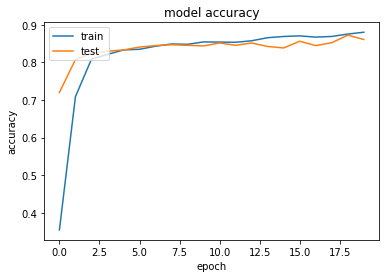

In [135]:
import matplotlib.pyplot as plt

plt.plot(history.history['angle_out_accuracy'])
plt.plot(history.history['val_angle_out_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [137]:
model.save('models/autopilot-23sep.h5')

In [138]:
def decode(angle_out):
    print(angle_out)
    angle_list = [-1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0]
    le = LabelEncoder()
    le.fit(angle_list)
    print('hjfhjddbg', list(le.inverse_transform(angle_out)))
    return list(le.inverse_transform(angle_out))[0]


decode([4])

[4]
hjfhjddbg [0.0]


0.0

In [140]:
Xtest

array([[[[168, 127, 104],
         [168, 127, 104],
         [167, 126, 103],
         ...,
         [163, 122,  97],
         [164, 123,  98],
         [164, 123,  98]],

        [[169, 128, 105],
         [168, 127, 104],
         [168, 127, 104],
         ...,
         [164, 123,  98],
         [164, 123,  98],
         [164, 123,  98]],

        [[171, 130, 105],
         [171, 130, 105],
         [170, 129, 104],
         ...,
         [165, 124,  99],
         [165, 124,  99],
         [165, 124,  99]],

        ...,

        [[139, 129, 122],
         [140, 130, 123],
         [138, 128, 121],
         ...,
         [254, 251, 247],
         [228, 224, 223],
         [203, 199, 198]],

        [[140, 130, 123],
         [137, 127, 120],
         [133, 123, 116],
         ...,
         [255, 253, 249],
         [242, 238, 237],
         [226, 222, 221]],

        [[146, 136, 129],
         [140, 130, 123],
         [132, 122, 115],
         ...,
         [255, 255, 252],
        

In [145]:
a=ypred[0]

In [146]:
b = np.zeros_like(ypred[0])
b[np.arange(len(a)), a.argmax(1)] = 1

In [147]:
b

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [142]:
ytest_angle

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [151]:
min(ypred[1])

array([-0.16205902], dtype=float32)

In [149]:
ytest_throttle

4033    0.15
4345    0.15
2564    0.15
2339    0.15
6294    0.15
        ... 
7746    0.15
4032    0.15
7262    0.15
8039    0.15
5980    0.15
Name: throttle, Length: 1612, dtype: float64